# Cliopatria statistics

In this notebook, we explore the Cliopatria dataset with some simple stats and graphs

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
cliopatria = gpd.read_file("../cliopatria.geojson")
cliopatria.sample(5)

,Name,FromYear,ToYear,Area,Type,Wikipedia,SeshatID,MemberOf,Components,geometry
11921,Paraguay,1820,1821,321603.969459,POLITY,Paraguay,,,,"POLYGON ((-54.48559 -24.65791, -54.41085 -24.6..."
6935,Comtat Venaissin,1352,1481,2343.584470,POLITY,Comtat Venaissin,,,,"POLYGON ((5.28032 44.25483, 5.19948 44.25483, ..."
14850,Republic of Slovenia,2024,2024,19553.539118,POLITY,Slovenia,,,,"POLYGON ((15.34273 45.62776, 15.26122 45.62776..."
4438,(Holy Roman Empire),962,969,736944.017001,POLITY,Holy Roman Empire,de_empire_1,,Holy Roman Empire,"MULTIPOLYGON (((10.13428 42.8864, 10.21482 42...."
7406,Aq Qoyunlu,1407,1414,56838.929327,POLITY,Aq Qoyunlu,ir_ak_koyunlu,,,"POLYGON ((38.54977 36.86818, 38.83744 36.67488..."


In [23]:
# Get the range of years available in the dataset
# Note: the range() function in Python generates numbers up to, but not including, the stop value
years = range(cliopatria['FromYear'].min(),
              cliopatria['ToYear'].max() + 1)
years

range(-3400, 2025)

In [24]:
# Calculate the number of of unique entries in the Name column
len(cliopatria['Name'].unique())

1876

In [25]:
# Calculate the number of unique entries in the Name column where MemberOf is a blank string
cliopatria_minus_subpolities = cliopatria[cliopatria['MemberOf'] == '']
len(cliopatria_minus_subpolities['Name'].unique())

1401

In [26]:
# Calculate the number of polities in the dataset for each year
polity_counts = []
for year in years:
    polity_counts.append(
        len(cliopatria_minus_subpolities[(cliopatria_minus_subpolities['FromYear'] <= year)
                                         & (cliopatria_minus_subpolities['ToYear'] >= year)
                                         ]['Name'].unique()
            )
        )

# Create a DataFrame with the results
polity_counts_df = pd.DataFrame({'Year': years, 'Number of polities': polity_counts})

In [27]:
# Take a look at 5 random years
polity_counts_df.sample(5)

,Year,Number of polities
2593,-807,12
217,-3183,2
2167,-1233,7
1855,-1545,11
3575,175,42


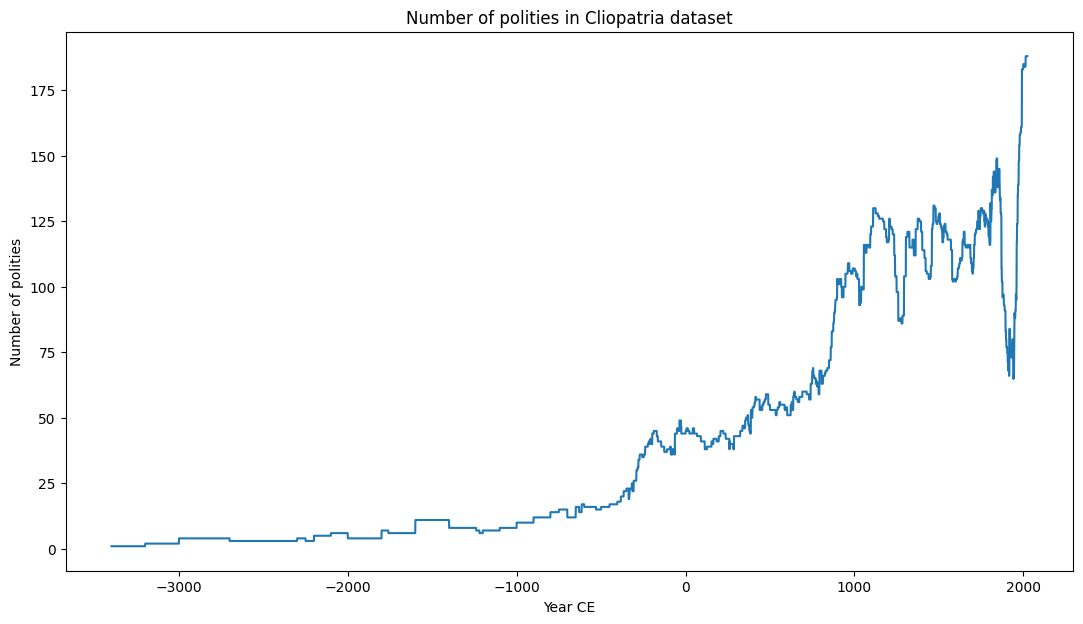

In [33]:
# Plot the number of polities over time
plt.figure(figsize=(13, 7))
plt.plot(polity_counts_df['Year'], polity_counts_df['Number of polities'])
plt.xlabel('Year CE')
plt.ylabel('Number of polities')
plt.title('Number of polities in Cliopatria dataset')
plt.show()

Now let's see if we can get take a look at how polity sizes changed over time...

In [29]:
# Calculate the mean and median of polity area in the dataset for each year
polity_means = []
polity_medians = []
for year in years:
    polity_areas = cliopatria_minus_subpolities[(cliopatria_minus_subpolities['FromYear'] <= year)
                                                & (cliopatria_minus_subpolities['ToYear'] >= year)
                                                ]['Area']
    polity_means.append(polity_areas.mean())
    polity_medians.append(polity_areas.median())

# Create a DataFrame with the results
polity_areas_df = pd.DataFrame({'Year': years,
                                'Mean polity area': polity_means,
                                'Median polity area': polity_medians})

In [30]:
# Take a look at 5 random years
polity_areas_df.sample(5)

,Year,Mean polity area,Median polity area
166,-3234,22012.292763,22012.292763
632,-2768,37374.710809,25143.590614
4126,726,505506.112572,118670.191426
1408,-1992,253682.586441,102812.806400
3224,-176,358500.015623,93098.560055


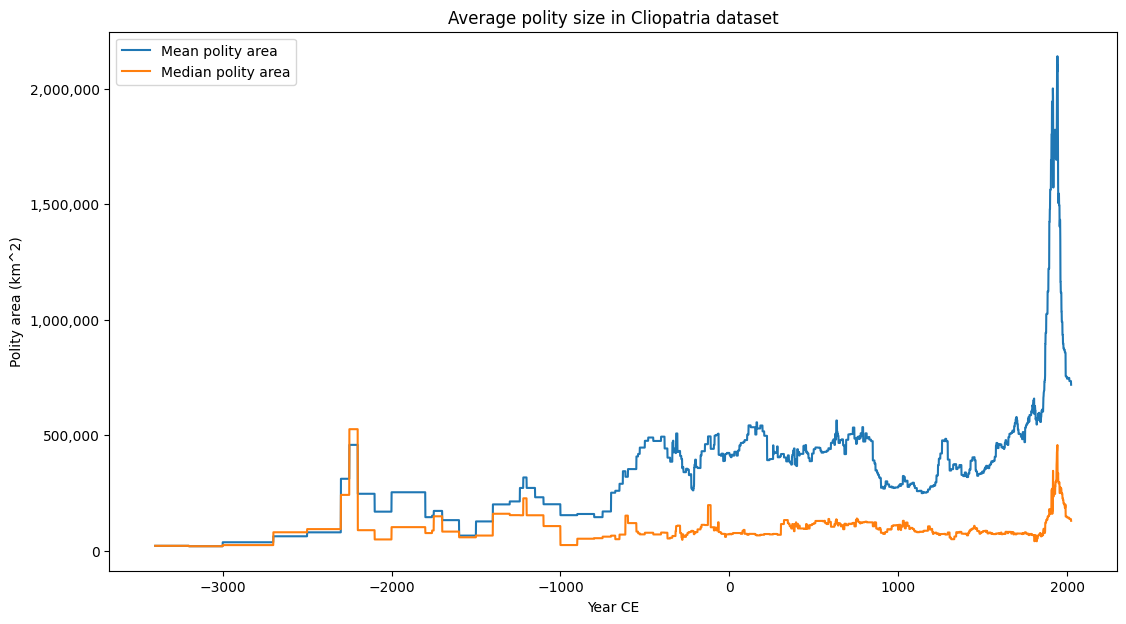

In [37]:
from matplotlib.ticker import FuncFormatter

# Create a plot showing how average polity size (area) changed over time
plt.figure(figsize=(13, 7))
plt.plot(polity_areas_df['Year'], polity_areas_df['Mean polity area'], label='Mean polity area')
plt.plot(polity_areas_df['Year'], polity_areas_df['Median polity area'], label='Median polity area')
plt.xlabel('Year CE')
plt.ylabel('Polity area (km^2)')
plt.title('Average polity size in Cliopatria dataset')
plt.legend()

# Format y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()